In [2]:
import pandas as pd

df_links = pd.read_csv("Data/links.csv")
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [3]:
df_links.count()

movieId    86537
imdbId     86537
tmdbId     86411
dtype: int64

In [4]:
# Hur många rader som saknar värde i varje kolumn
df_links.isna().sum()

movieId      0
imdbId       0
tmdbId     126
dtype: int64

In [5]:
df_movies = pd.read_csv("Data/movies.csv")
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
df_movies.count()

movieId    86537
title      86537
genres     86537
dtype: int64

## Analysera ratings.csv 

In [7]:
df_ratings = pd.read_csv("Data/ratings.csv")
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119


In [8]:
df_ratings.count()

userId       33832162
movieId      33832162
rating       33832162
timestamp    33832162
dtype: int64

In [9]:
# Grundläggande analys
print("Antal rader och kolumner:", df_ratings.shape)
print("Saknade värden per kolumn:\n", df_ratings.isna().sum())

Antal rader och kolumner: (33832162, 4)
Saknade värden per kolumn:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


Fördelning av betyg:
rating
0.5     566306
1.0    1013645
1.5     562409
2.0    2146492
2.5    1760733
3.0    6400664
3.5    4465001
4.0    8835955
4.5    3123055
5.0    4957902
Name: count, dtype: int64


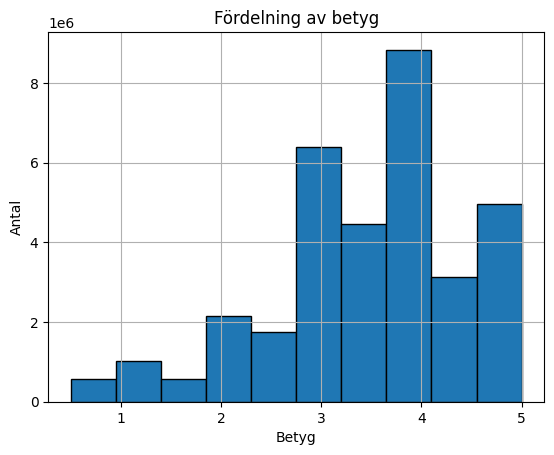

In [21]:
# Fördelning av betyg (textutskrift)
rating_distribution = df_ratings['rating'].value_counts().sort_index()
print("Fördelning av betyg:")
print(rating_distribution)

# Fördelning av betyg
import matplotlib.pyplot as plt

df_ratings['rating'].hist(bins=10, edgecolor='black')
plt.title('Fördelning av betyg')
plt.xlabel('Betyg')
plt.ylabel('Antal')
plt.show()

## Analysera tags.csv

In [22]:
df_tags = pd.read_csv("Data/tags.csv")
df_tags.head()

,userId,movieId,tag,timestamp
0,10,260,good vs evil,1430666558
1,10,260,Harrison Ford,1430666505
2,10,260,sci-fi,1430666538
3,14,1221,Al Pacino,1311600756
4,14,1221,mafia,1311600746


In [23]:
df_tags.count()

userId       2328315
movieId      2328315
tag          2328298
timestamp    2328315
dtype: int64

In [24]:
# Hur många rader som saknar värde i varje kolumn
df_tags.isna().sum()

userId        0
movieId       0
tag          17
timestamp     0
dtype: int64

In [25]:
# Grundläggande analys
print("Antal rader och kolumner:", df_tags.shape)
print("Unika taggar:", df_tags['tag'].nunique())
print("Saknade värden per kolumn:\n", df_tags.isna().sum())

Antal rader och kolumner: (2328315, 4)
Unika taggar: 153949
Saknade värden per kolumn:
 userId        0
movieId       0
tag          17
timestamp     0
dtype: int64


In [26]:
# Kombinera med movies.csv
df_movies_with_tags = pd.merge(df_movies, df_tags, on='movieId', how='left')
df_movies_with_tags.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,499.0,animation,1.422606e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,499.0,friendship,1.422606e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,499.0,toys,1.422606e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1114.0,animation,1.147411e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1114.0,Disney,1.147450e+09


In [27]:
# Skapa one-hot encoding för genrer
genres = df_movies['genres'].str.get_dummies(sep='|')
genres.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
# Analysera unika genrer
print("Antal unika genrer:", genres.shape[1])
print("Vanligaste genrerna:\n", genres.sum().sort_values(ascending=False))

Antal unika genrer: 20
Vanligaste genrerna:
 Drama                 33681
Comedy                22830
Thriller              11675
Romance               10172
Action                 9563
Documentary            9283
Horror                 8570
(no genres listed)     7060
Crime                  6917
Adventure              5349
Sci-Fi                 4850
Animation              4579
Children               4367
Mystery                3972
Fantasy                3821
War                    2301
Western                1690
Musical                1059
Film-Noir               354
IMAX                    195
dtype: int64


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

df_tags = df_tags.dropna(subset=["tag"])

unique_tags = df_tags["tag"].unique()
print(f"Antal unika taggar: {len(unique_tags)}")

vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df_tags["tag"])

tfidf_scores = zip(vectorizer.get_feature_names_out(), tfidf_matrix.sum(axis=0).tolist()[0])
sorted_tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)

print("De vanligaste taggarna baserat på TF-IDF")
for tag, score in sorted_tfidf_scores[:10]:
    print(f"{tag}: {score}")

Antal unika taggar: 153949
De vanligaste taggarna baserat på TF-IDF
comedy: 25283.598246024565
dark: 14943.210639194944
on: 14660.474472233083
action: 14576.81754085634
of: 13834.7270742077
ending: 13621.30449081177
atmospheric: 12852.771737257195
to: 12422.642768065061
fi: 11886.032141742173
sci: 11828.725830904377
